In [1]:
import numpy as np

In [2]:
class vanillaGrad(object):
    def __init__(self,weight_shape, learning_rate=0.1, loss_function="MSE"):
        self.weights = np.array(np.random.randn(weight_shape), ndmin=2)
        self.lr = learning_rate
        self.loss = loss_function
        self.history = {}

    def update_w(self, X, y):
        """ The default loss function is the preferred Mean Squared error, the other alternative is the MAE"""
        dl_dw = 0
        
        
        N = len(X)
            #looping over all the training data
        for i in range(N):
            x = np.array(X[i], ndmin=2).T
            np.dot(self.weights, x)  

            if self.loss == "MSE":                            
                dl_dw += (-2 *x * (y[i] - np.dot(self.weights, x)))
            else:
                #dl_dw += ((y[i] - np.dot(self.weights, x)) * -x)/(y[i] - np.dot(self.weights, x)) * -1
                #change this later 
                dl_dw += (-2 *x * (y[i] - np.dot(self.weights, x)))
                     
                
        #update the weight matrix
        #dividing by N to average the loss
        self.weights -= 1/N * (self.lr * dl_dw.T)

        return self.weights

    def average_loss(self, X, y):
            X = np.array(X, ndmin=2)
            total_error = 0.0
            N = len(X)
            for i in range(N):
                x = X[i].T
                if self.loss == "MSE":
                    total_error += (y[i] - np.dot(self.weights, x)) **2
                else:
                    total_error += (y[i] - np.dot(self.weights, x)) * -1

            return total_error / N

        
    def train(self, X, y, epochs):
        for epoch in range(epochs):
                w = self.update_w(X, y)
                self.history[epoch] = self.average_loss(X, y)

                print(f"Epoch {epoch} / {epochs}: loss {self.history[epoch]}")

In [18]:
#generating data 
X = np.random.rand(100, 4)
y = []
# y = 2x1 + 3x2
for x in X:
    y.append(2*x[0] + 3*x[1] + x[2] + 0.3*x[3])


In [15]:
network = vanillaGrad(4, 0.3, "MSE")

In [16]:
network.train(X, y, epochs=1000)
network.weights

Epoch 0 / 1000: loss [1.73583867]
Epoch 1 / 1000: loss [0.61253776]
Epoch 2 / 1000: loss [0.44876684]
Epoch 3 / 1000: loss [0.40232527]
Epoch 4 / 1000: loss [0.37192772]
Epoch 5 / 1000: loss [0.34526518]
Epoch 6 / 1000: loss [0.32072383]
Epoch 7 / 1000: loss [0.29798464]
Epoch 8 / 1000: loss [0.27689382]
Epoch 9 / 1000: loss [0.25732634]
Epoch 10 / 1000: loss [0.23916886]
Epoch 11 / 1000: loss [0.22231698]
Epoch 12 / 1000: loss [0.20667436]
Epoch 13 / 1000: loss [0.19215199]
Epoch 14 / 1000: loss [0.17866766]
Epoch 15 / 1000: loss [0.16614537]
Epoch 16 / 1000: loss [0.15451489]
Epoch 17 / 1000: loss [0.14371124]
Epoch 18 / 1000: loss [0.13367436]
Epoch 19 / 1000: loss [0.12434865]
Epoch 20 / 1000: loss [0.11568269]
Epoch 21 / 1000: loss [0.10762887]
Epoch 22 / 1000: loss [0.1001431]
Epoch 23 / 1000: loss [0.09318456]
Epoch 24 / 1000: loss [0.08671544]
Epoch 25 / 1000: loss [0.08070071]
Epoch 26 / 1000: loss [0.07510792]
Epoch 27 / 1000: loss [0.06990696]
Epoch 28 / 1000: loss [0.065069

array([[2. , 3. , 1. , 0.3]])

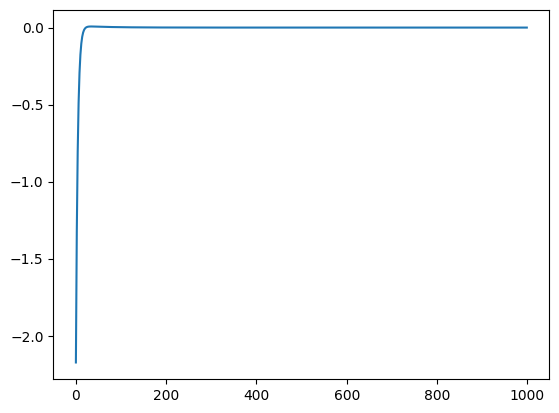

In [6]:
import matplotlib.pyplot as plt 
plt.plot(network.history.keys(), network.history.values())